In [1]:
import nilearn.image, nilearn.datasets, nilearn.plotting

import numpy as np
import matplotlib.pyplot as plt

/Users/eyshin/.pyenv/versions/eyspy3.6/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/Users/eyshin/.pyenv/versions/eyspy3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/eyshin/.pyenv/versions/eyspy3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: Fut

In [2]:
def cluster_region_description(result_img, atlas_img=None, labels=None):
    if atlas_img is None:
        dataset = nilearn.datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm', symmetric_split=True)
        atlas_img = nilearn.image.load_img(dataset['maps'])
        labels = dataset['labels']
    
    resampled_atlas_img = nilearn.image.resample_to_img(source_img=atlas_img, target_img=result_img, interpolation='nearest')
    
    result_img = nilearn.image.math_img(img1=result_img, formula='img1 != 0')
    masked_atlas_img = nilearn.image.math_img(img1=resampled_atlas_img, img2=result_img, formula='img1 * img2')
    
    data = masked_atlas_img.get_data()
    data = data[data != 0]
    
    return {labels[n]: np.sum(data==n) for n in np.unique(data)}

In [3]:
roi_img = nilearn.image.load_img('resam_AAL.nii.gz') # general AAL atlas image but resampled

aal_info = [
    (1, 'Precentral_L', 2001),
    (2, 'Precentral_R', 2002),
    (3, 'Frontal_Sup_L', 2101),
    (4, 'Frontal_Sup_R', 2102),
    (5, 'Frontal_Sup_Orb_L', 2111),
    (6, 'Frontal_Sup_Orb_R', 2112),
    (7, 'Frontal_Mid_L', 2201),
    (8, 'Frontal_Mid_R', 2202),
    (9, 'Frontal_Mid_Orb_L', 2211),
    (10, 'Frontal_Mid_Orb_R', 2212),
    (11, 'Frontal_Inf_Oper_L', 2301),
    (12, 'Frontal_Inf_Oper_R', 2302),
    (13, 'Frontal_Inf_Tri_L', 2311),
    (14, 'Frontal_Inf_Tri_R', 2312),
    (15, 'Frontal_Inf_Orb_L', 2321),
    (16, 'Frontal_Inf_Orb_R', 2322),
    (17, 'Rolandic_Oper_L', 2331),
    (18, 'Rolandic_Oper_R', 2332),
    (19, 'Supp_Motor_Area_L', 2401),
    (20, 'Supp_Motor_Area_R', 2402),
    (21, 'Olfactory_L', 2501),
    (22, 'Olfactory_R', 2502),
    (23, 'Frontal_Sup_Medial_L', 2601),
    (24, 'Frontal_Sup_Medial_R', 2602),
    (25, 'Frontal_Med_Orb_L', 2611),
    (26, 'Frontal_Med_Orb_R', 2612),
    (27, 'Rectus_L', 2701),
    (28, 'Rectus_R', 2702),
    (29, 'Insula_L', 3001),
    (30, 'Insula_R', 3002),
    (31, 'Cingulum_Ant_L', 4001),
    (32, 'Cingulum_Ant_R', 4002),
    (33, 'Cingulum_Mid_L', 4011),
    (34, 'Cingulum_Mid_R', 4012),
    (35, 'Cingulum_Post_L', 4021),
    (36, 'Cingulum_Post_R', 4022),
    (37, 'Hippocampus_L', 4101),
    (38, 'Hippocampus_R', 4102),
    (39, 'ParaHippocampal_L', 4111),
    (40, 'ParaHippocampal_R', 4112),
    (41, 'Amygdala_L', 4201),
    (42, 'Amygdala_R', 4202),
    (43, 'Calcarine_L', 5001),
    (44, 'Calcarine_R', 5002),
    (45, 'Cuneus_L', 5011),
    (46, 'Cuneus_R', 5012),
    (47, 'Lingual_L', 5021),
    (48, 'Lingual_R', 5022),
    (49, 'Occipital_Sup_L', 5101),
    (50, 'Occipital_Sup_R', 5102),
    (51, 'Occipital_Mid_L', 5201),
    (52, 'Occipital_Mid_R', 5202),
    (53, 'Occipital_Inf_L', 5301),
    (54, 'Occipital_Inf_R', 5302),
    (55, 'Fusiform_L', 5401),
    (56, 'Fusiform_R', 5402),
    (57, 'Postcentral_L', 6001),
    (58, 'Postcentral_R', 6002),
    (59, 'Parietal_Sup_L', 6101),
    (60, 'Parietal_Sup_R', 6102),
    (61, 'Parietal_Inf_L', 6201),
    (62, 'Parietal_Inf_R', 6202),
    (63, 'SupraMarginal_L', 6211),
    (64, 'SupraMarginal_R', 6212),
    (65, 'Angular_L', 6221),
    (66, 'Angular_R', 6222),
    (67, 'Precuneus_L', 6301),
    (68, 'Precuneus_R', 6302),
    (69, 'Paracentral_Lobule_L', 6401),
    (70, 'Paracentral_Lobule_R', 6402),
    (71, 'Caudate_L', 7001),
    (72, 'Caudate_R', 7002),
    (73, 'Putamen_L', 7011),
    (74, 'Putamen_R', 7012),
    (75, 'Pallidum_L', 7021),
    (76, 'Pallidum_R', 7022),
    (77, 'Thalamus_L', 7101),
    (78, 'Thalamus_R', 7102),
    (79, 'Heschl_L', 8101),
    (80, 'Heschl_R', 8102),
    (81, 'Temporal_Sup_L', 8111),
    (82, 'Temporal_Sup_R', 8112),
    (83, 'Temporal_Pole_Sup_L', 8121),
    (84, 'Temporal_Pole_Sup_R', 8122),
    (85, 'Temporal_Mid_L', 8201),
    (86, 'Temporal_Mid_R', 8202),
    (87, 'Temporal_Pole_Mid_L', 8211),
    (88, 'Temporal_Pole_Mid_R', 8212),
    (89, 'Temporal_Inf_L', 8301),
    (90, 'Temporal_Inf_R', 8302),
    (91, 'Cerebelum_Crus1_L', 9001),
    (92, 'Cerebelum_Crus1_R', 9002),
    (93, 'Cerebelum_Crus2_L', 9011),
    (94, 'Cerebelum_Crus2_R', 9012),
    (95, 'Cerebelum_3_L', 9021),
    (96, 'Cerebelum_3_R', 9022),
    (97, 'Cerebelum_4_5_L', 9031),
    (98, 'Cerebelum_4_5_R', 9032),
    (99, 'Cerebelum_6_L', 9041),
    (100, 'Cerebelum_6_R', 9042),
    (101, 'Cerebelum_7b_L', 9051),
    (102, 'Cerebelum_7b_R', 9052),
    (103, 'Cerebelum_8_L', 9061),
    (104, 'Cerebelum_8_R', 9062),
    (105, 'Cerebelum_9_L', 9071),
    (106, 'Cerebelum_9_R', 9072),
    (107, 'Cerebelum_10_L', 9081),
    (108, 'Cerebelum_10_R', 9082),
    (109, 'Vermis_1_2', 9100),
    (110, 'Vermis_3', 9110),
    (111, 'Vermis_4_5', 9120),
    (112, 'Vermis_6', 9130),
    (113, 'Vermis_7', 9140),
    (114, 'Vermis_8', 9150),
    (115, 'Vermis_9', 9160),
    (116, 'Vermis_10', 9170)
]

aal_info_dict = {
    c: b
    for a, b, c in aal_info
}

In [4]:
clust_img_fnames = [
    'cluster1.nii.gz', 
    'cluster2.nii.gz'
]

{'Right Intracalcarine Cortex': 10, 'Left Lingual Gyrus': 79, 'Right Lingual Gyrus': 105, 'Left Occipital Fusiform Gyrus': 19, 'Right Occipital Fusiform Gyrus': 17, 'Left Occipital Pole': 74, 'Right Occipital Pole': 101}


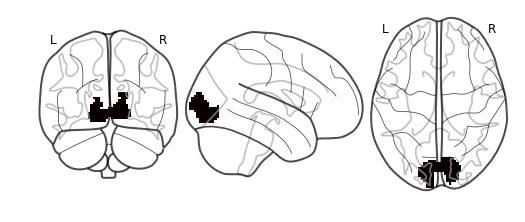

{'Right Intracalcarine Cortex': 20, 'Left Lingual Gyrus': 114, 'Right Lingual Gyrus': 148, 'Left Occipital Fusiform Gyrus': 49, 'Right Occipital Fusiform Gyrus': 34, 'Left Occipital Pole': 112, 'Right Occipital Pole': 130}


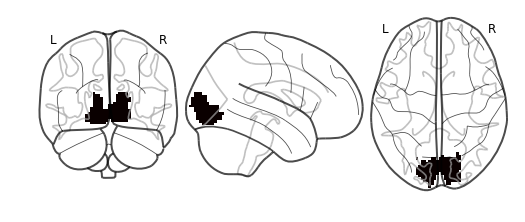

In [6]:
for fname in clust_img_fnames:
    clust_img = nilearn.image.load_img(fname)
    clust_img = nilearn.image.math_img(img1=clust_img, formula='img1 > 5.794')
    nilearn.plotting.plot_glass_brain(clust_img)
    print(cluster_region_description(clust_img))
    plt.show()